## YOLO v3 Python Run
Adapted from [YOLO documentation](https://pjreddie.com/darknet/yolo/)

Ernest M 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import libs.darknet as dn
import numpy as np
from scipy.misc import imread
from skimage import io
import cv2

In [2]:
def array_to_image(arr):
    arr = arr.transpose(2,0,1)
    c = arr.shape[0]
    h = arr.shape[1]
    w = arr.shape[2]
    arr = (arr/255.0).flatten()
    data = dn.c_array(dn.c_float, arr)
    im = dn.IMAGE(w,h,c,data)
    return im

In [3]:
# Darknet
net = dn.load_net(b"cfg/yolov3-tiny.cfg", b"weights/yolov3-tiny.weights", 0)
meta = dn.load_meta(b"cfg/coco.data")
r = dn.detect(net, meta, b"data/dog.jpg")
print(r)

[(b'car', 0.6152912378311157, (572.1994018554688, 120.48186492919922, 214.3546600341797, 98.72494506835938)), (b'bicycle', 0.5850223302841187, (390.9443359375, 300.541259765625, 369.40216064453125, 299.3248291015625)), (b'dog', 0.5707316994667053, (249.094970703125, 352.12335205078125, 239.8490753173828, 330.763671875))]


Run the command line YOLO

In [4]:
import os

In [5]:
os.system('bash runyolo.sh ./data/dog.jpg')

0

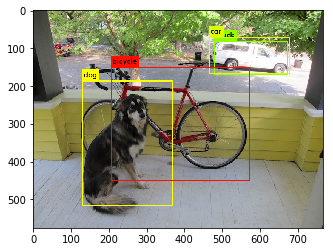

In [6]:
output = cv2.imread('./predictions.png')
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)

Try different ways of reading in the image

In [7]:
# scipy
arr= imread('data/dog.jpg')
im = array_to_image(arr)
r = dn.detect3(net, meta, im)
# r = detect2(net, meta, im)
print(r)

/Users/emwebaze/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


[(b'car', 0.6321348547935486, (572.3128662109375, 120.62386322021484, 214.2501983642578, 98.35964965820312)), (b'bicycle', 0.5906360745429993, (390.8594055175781, 300.51641845703125, 370.8562927246094, 298.80206298828125)), (b'dog', 0.5691174864768982, (249.06320190429688, 351.95654296875, 241.0352325439453, 330.10369873046875))]


In [8]:
# OpenCV
arr = cv2.imread('data/dog.jpg')
arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
im = array_to_image(arr)
r = dn.detect3(net, meta, im)
print(r)

[(b'car', 0.6321246027946472, (572.3128662109375, 120.62422943115234, 214.2503662109375, 98.3592758178711)), (b'bicycle', 0.5906582474708557, (390.8597412109375, 300.51641845703125, 370.8560791015625, 298.8026123046875)), (b'dog', 0.5691496729850769, (249.0634765625, 351.9570007324219, 241.03440856933594, 330.1043395996094))]


In [4]:
# skimage
img = io.imread('data/dog.jpg')
im = array_to_image(img)
r = dn.detect3(net, meta, im)
print(r)

[(b'car', 0.6321348547935486, (572.3128662109375, 120.62386322021484, 214.2501983642578, 98.35964965820312)), (b'bicycle', 0.5906360745429993, (390.8594055175781, 300.51641845703125, 370.8562927246094, 298.80206298828125)), (b'dog', 0.5691174864768982, (249.06320190429688, 351.95654296875, 241.0352325439453, 330.10369873046875))]


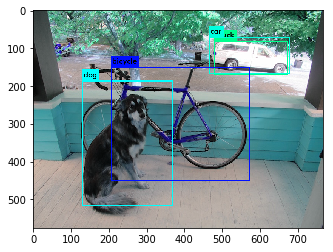

In [6]:
imgpred = cv2.imread('data/predictions.png')
plt.imshow(imgpred)